In [ ]:
import requests
import time
import re
import pandas as pd
import matplotlib.pyplot as plt

def get_url(i):
    url = f'https://movie.douban.com/subject/35231822/comments?start={i * 20}&limit=20&status=P&sort=new_score'
    return url

def get_info(url):
    headers = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36 Edg/102.0.1245.39"}
    response = requests.get(url, headers=headers)
    html = response.text
    comments_list = [i for i in re.findall('<span class="short">(.*?)</span>', html , re.S)]
    comments_time_list = [i.strip() for i in re.findall('<span class="comment-time " title="(.*?)">',html, re.S)]

    df = pd.DataFrame({"评论时间": comments_time_list, "评论内容": comments_list})
    return df

if __name__ == "__main__":
    df = pd.DataFrame(columns=['评论时间','评论内容'],dtype=object)
    for i in range(1,40):
        url = get_url(i)
        print(f"正在打印第{i}页")
        df1 = get_info(url)
        df = pd.concat([df,df1])
        time.sleep(50)
    df.to_csv('梦华录.csv',encoding='utf_8_sig')

不     63
都     54
看     50
真的    49
…     41
      ..
怨种     1
编排     1
需要     1
霸气     1
看见     1
Length: 2024, dtype: int64


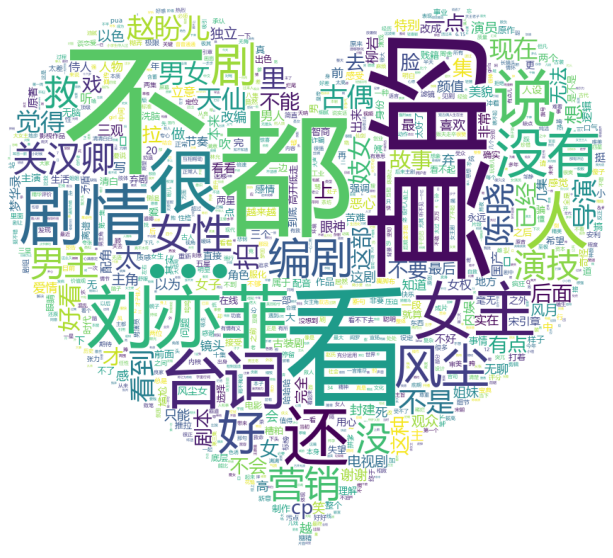

In [8]:
#导入第三方库
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from imageio import imread
import pandas as pd
#导入爬取的数据
df = pd.read_csv("梦华录.csv",index_col=0)
# 分词操作
jieba.add_word("梦华录")
df["切分后评论"] = df["评论内容"].apply(jieba.lcut)
# 去除停用词
with open("HITstopwords.txt","r",encoding="UTF-8") as f:
    stop = f.read()  # 返回的是一个字符串
stop = stop.split()  # 这里得到的是一个列表
stop = stop + [" ","\n","\t"]
df_after = df["切分后评论"].apply(lambda x: [i for i in x if i not in stop])
#print(df_after)
# 词频统计
all_words = []
for i in df_after:
    all_words.extend(i)
word_count = pd.Series(all_words).value_counts()
print(word_count)

#绘制词云图
# 读取背景图片
back_picture = imread("heart2.jpg")
# 设置词云参数
wc = WordCloud(font_path="msyh.ttc",#font_path="F:\Python\Winter\dist\图表\SimHei.ttf",
               background_color='white',#background_color="black",
               max_words=2000,
               mask=back_picture,
               max_font_size=200,
               random_state=42
              )
wc2 = wc.fit_words(word_count)
# 绘制词云图
plt.figure(figsize=(20,10))
plt.imshow(wc2)
plt.axis("off")
plt.show()
wc.to_file("ciyun.png")